In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import time, copy, random


# TSP instance

In [2]:
'''loading a TSP instance from      http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/   '''


data = np.loadtxt("berlin52.tsp")     


#-----------------------------------------------------------------------

coordinate = data[:,1:3]  # (x,y) coordinates of nodes (cities) = Nx2 matrix

N = len(coordinate)  
print("number of nodes (cities) = " +str(N))


number of nodes (cities) = 52


# functions for distance, cost, and to generate new solution in a neighbourhood of old solution

$ $

In [3]:
def distance(a,b):
    dis = np.linalg.norm(a-b, 2)     # = L2 norm (euclidean distance between node a and b) 
    return dis

#-----------------------------------------------------------------------

def cost(sol):
    c = 0
    for i in range(N-1):
        c += distance(coordinate[sol[i]], coordinate[sol[i+1]])
    c = c + distance(coordinate[sol[N-1]], coordinate[sol[0]])
    return c

#-----------------------------------------------------------------------
'''
One can use either 'n_NewSols' or 'all_pair_perm_Sols' to generate new solutions.
Through 'all_pair_perm_Sols' will take more time as the number of new solutions is large there.
'''


all_node_ids = np.arange(N)


def n_NewSols(sol, n, max_ngb_size):            # 2 <= max_ngb_size = max length of a permutation cycle <= N
    Sols = []                                   # n = number of new solutions
    
    for i in range(n):
        ngb_size = np.random.randint(2, max_ngb_size+1 )                        # permutation cycle length
        rand_idx = np.random.choice(all_node_ids, size=ngb_size, replace=False) # generating random permutation cycle
        #print(rand_idx)

        new_sol = copy.deepcopy(sol)           # copy the old sloution
        for k in range(rand_idx.shape[0]-1):   # apply the permutation (of nodes) on the old solution
            new_sol[rand_idx[k+1]] = sol[rand_idx[k]] 
        new_sol[rand_idx[0]] = sol[rand_idx[-1]]  
        Sols.append(new_sol)
    return np.array(Sols)

#-----------------------------------------------------------------------

def all_pair_perm_Sols(sol):                    # all (N^2 - N)/2 piars of nodes are taken for permutation
    Sols = []
    for i in range(N):
        for j in range(i+1, N):
            new_sol = copy.deepcopy(sol)        # copy old sloution
            new_sol[i] = sol[j]                 # permutation of two nodes i,j in sol to get new_sol
            new_sol[j] = sol[i]
            Sols.append(new_sol)
    return np.array(Sols)


# generate in initial solution for simulated annealing

A sequence of all N nodes represents the order in which they are travelled. <br>
It represents a feasible solution of the TSP. <br>
A permutation of such a sequecnce will again be a feasible solution.

$ $

In [4]:
sol_in = np.random.permutation(N)
cost_in = cost(sol_in)

#-----------------------------------------------------------------------

print("random initial solution = " +str(sol_in))
print("initial cost = " +str(round(cost_in, 2)))


random initial solution = [44 46 49 23 15  6 47 29 22 45 32 17 35 41  9 10 31 37  1 21 43 34 42 48
 39  7 18  8 36 30 12 19 50 16 51 14 28 40 26  4 24 33 20  3  0  2 11  5
 27 13 38 25]
initial cost = 32097.08


#  Simulated Annealing iterations to minimize the total cost

iteration = 500, cost = 14609.73 
iteration = 1000, cost = 14219.94 
iteration = 1500, cost = 13745.47 
iteration = 2000, cost = 11452.37 
iteration = 2500, cost = 10685.97 
iteration = 3000, cost = 10302.91 
iteration = 3500, cost = 10582.97 
iteration = 4000, cost = 11423.84 
iteration = 4500, cost = 10918.92 
shape of COST = (3618, 2)

 time taken in sec. =  58.671


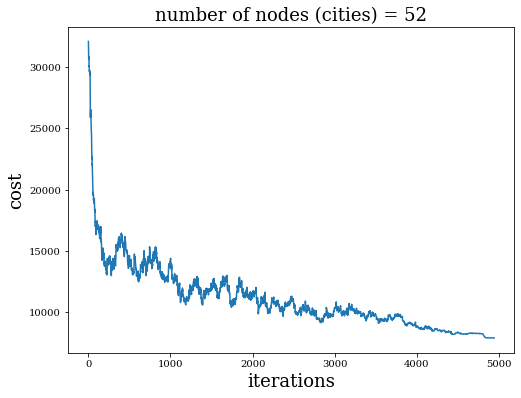

Optimized solution (sequence of nodes) = [17 30 22 19 49 43 15 28 29  1  6 41 20 16  2 44 18 40  7  8  9 42 32 50
 10 51 13 12 46 25 26 27 11  3 24 45 47 23  4  5 14 37 36 39 38 33 34 35
 48 31  0 21]
Optimized (minimized) cost = 7895.64


In [5]:
n = 50                    # n = number of new solutions generated in each iteration
max_ngb_size = 3          # 2 <= max_ngb_size = max length of a permutation cycle <= N

    

#--------------Initialization----------------------

I = 5000                                   # total number of iterations
T_initial, T_final = 200, 1e-5             # initial and final temperature 
gamma = (T_initial - T_final)/I


SOL = np.array([sol_in])                   # sol after an Iteration
COST = [[0, cost_in]]                      # cost after an Iteration


t1_start = time.time()                     # start the stopwatch

#---------------------------------------------------

for itr in range(1,I):                       # itr = 0,1,2,...,(I-1)
    
    T = T_initial - gamma*itr              # temperature decreases by gamma in each terations
    s = SOL[-1]                            # last accepted solution
    
    
    ''' One can use either 'n_NewSols' or 'all_pair_perm_Sols' to generate new solutions.
    Through 'all_pair_perm_Sols' will take more time as the number of new solutions is large there.
    '''
    
    ss = n_NewSols(s, n, max_ngb_size)    # new solutions
    #ss = all_pair_perm_Sols(s)
    len_ss = len(ss)
    cs = np.array([])                      # costs of new solutions
    for k in range(len(ss)):
        cs = np.append(cs, cost(ss[k]))  
    
    deltas = cs - COST[-1][1]              # cost differences news-old
    
    
    #---------------------------------------------------
    
    alpha = np.random.rand()
    flags = np.where(alpha <= np.minimum(np.ones(len_ss), np.exp(-deltas/T))) # indices of accepted sols
    flags = flags[0]
    
    if 0 < len(flags): # if there is atleast one accepted solution, then append a rand_accepted_sol in SOL
        rand_accepted_sol_idx = random.choice(flags)
        
        SOL = np.append(SOL, np.reshape(ss[rand_accepted_sol_idx],(1,N)), axis=0)
        COST.append([itr, cs[rand_accepted_sol_idx]]) 

    
    #-----------------------------------------------------------------------------
    
    if itr % 500 == 0: 
         print(f"iteration = {itr}, cost = {round(cs[rand_accepted_sol_idx], 2)} ")



#--------------------------------------------------
COST = np.array(COST)   
print('shape of COST =', COST.shape)
            
t1_stop = time.time()                         # Stop the stopwatch 
time_taken = t1_stop - t1_start 
print("\n time taken in sec. = ", round(time_taken,3))
            
#===================================================================================================


plt.rcParams["figure.figsize"] = (8,6)
plt.rc('font', family='serif')
fontsize = 18

plt.plot(COST[:,0], COST[:,1])
plt.ylabel('cost',fontsize=fontsize )
plt.xlabel('iterations', fontsize=fontsize)
plt.title("number of nodes (cities) = " +str(N), fontsize=fontsize )
plt.show()

final_sol = SOL[-1]
final_cost = COST[-1, 1]

print("Optimized solution (sequence of nodes) = " +str(final_sol))
print("Optimized (minimized) cost = " +str(round(final_cost,2)))



# solution

number of nodes (cities) = N = 52
T_initial = 200, T_final = 1e-05
Total iterations = 5000 

time taken in sec. = 58.671 



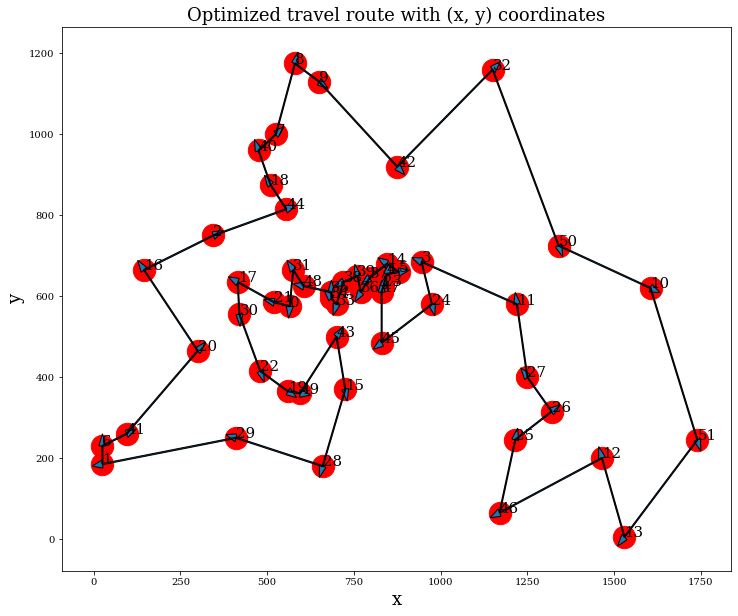

Optimized solution (sequence of nodes) = [17 30 22 19 49 43 15 28 29  1  6 41 20 16  2 44 18 40  7  8  9 42 32 50
 10 51 13 12 46 25 26 27 11  3 24 45 47 23  4  5 14 37 36 39 38 33 34 35
 48 31  0 21]
Optimized (minimized) cost = 7895.64


In [6]:
print("number of nodes (cities) = N = " +str(N))
print(f"T_initial = {T_initial}, T_final = {T_final}")
print(f"Total iterations = {I} \n")


print(f"time taken in sec. = {round(time_taken,3)} \n")

#-----------------------------------------------------------------------------


plt.rcParams["figure.figsize"] = (12,10)

x_coord = coordinate[:,0]
y_coord = coordinate[:,1]
plt.scatter(x_coord, y_coord, s=500, c='red')
plt.xlabel('x', fontsize=fontsize)
plt.ylabel('y', fontsize=fontsize)

for i in range(N):
    plt.annotate(i, coordinate[i], fontsize=15)
    
    if i<N-1:
        coord = coordinate[final_sol[i]]
        diff = coordinate[final_sol[i+1]]-coordinate[final_sol[i]]
        plt.arrow(coord[0], coord[1], diff[0], diff[1], width=3, head_width=20)

coord = coordinate[final_sol[-1]]
diff = coordinate[final_sol[0]]-coordinate[final_sol[-1]]
plt.arrow(coord[0], coord[1], diff[0], diff[1],width=3, head_width=20)

plt.title('Optimized travel route with (x, y) coordinates', fontsize=fontsize)
plt.show()

#-----------------------------------------------------------------------------

print("Optimized solution (sequence of nodes) = " +str(final_sol))
print("Optimized (minimized) cost = " +str(round(final_cost,2)))



In [7]:
'''a TSP instance from      http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/   '''


optSol = np.loadtxt("berlin52.opt.tour", dtype="int")-1
optcost = cost(optSol)

print("Optimal solution = " +str(optSol))
print("Optimal cost = " +str(round(optcost,2)))  #relative error 

print("----------------------------------------------------")

print("approximation error  = " +str( round(((final_cost - optcost)/optcost)*100, 2) ) + " %" )



Optimal solution = [ 0 48 31 44 18 40  7  8  9 42 32 50 10 51 13 12 46 25 26 27 11 24  3  5
 14  4 23 47 37 36 39 38 35 34 33 43 45 15 28 49 19 22 29  1  6 41 20 16
  2 17 30 21]
Optimal cost = 7544.37
----------------------------------------------------
approximation error  = 4.66 %
